In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Data preparation

In [4]:
historicalsale=pd.read_csv("E:\工作\百威\(Replace)Historical Sales Volume 2016.1-2019.11.csv")
masterdata=pd.read_csv("E:\工作\百威\(Replace)Product Master Data.csv")
commercialplanning=pd.read_csv("E:\工作\百威\(Replace)Commercial Planning.csv")

In [5]:
saleseries=pd.read_csv("C:/Users/mings/BUD/rearranged_sale.csv")
calendar=pd.read_csv("E:\工作\百威\calendar.csv")

In [6]:
historicalsale['Date']=historicalsale['Date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))

In [7]:
historicalsale.set_index('Date',inplace=True)

In [8]:
historicalsale['Day']=historicalsale.index.map(lambda x: x.day)

In [9]:
historicalsale

,Year,Month,YM,SalesRegion,SKU Code,VolumeHL,Day
Date,,,,,,,
2016-01-02,2016,1,201601,Heilongjiang,1,2020,2
2016-01-02,2016,1,201601,Heilongjiang,4,79,2
2016-01-02,2016,1,201601,Heilongjiang,9,138,2
2016-01-02,2016,1,201601,Heilongjiang,11,32,2
2016-01-02,2016,1,201601,Heilongjiang,13,95,2
...,...,...,...,...,...,...,...
2019-11-30,2019,11,201911,Jilin,63,1056,30
2019-11-30,2019,11,201911,Jilin,64,1831,30
2019-11-30,2019,11,201911,Jilin,66,43,30


In [10]:
# create new historical sale which will contain all the  zero
from datetime import datetime
saleseries['Unnamed: 0']=saleseries['Unnamed: 0'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
saleseries

,Unnamed: 0,Heilongjiang_1,Heilongjiang_4,Heilongjiang_9,Heilongjiang_11,Heilongjiang_13,Heilongjiang_14,Heilongjiang_15,Heilongjiang_16,Heilongjiang_17,...,Jilin_64,Jilin_61,Jilin_66,Jilin_68,Jilin_65,Jilin_69,Jilin_62,Jilin_63,Jilin_45,Jilin_2
0,2016-01-02,2020.0,79.0,138.0,32.0,95.0,60.0,484.0,1771.0,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03,1544.0,158.0,NaN,NaN,48.0,989.0,NaN,2800.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,1992.0,32.0,69.0,NaN,158.0,595.0,230.0,1784.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-05,2592.0,NaN,NaN,NaN,285.0,535.0,NaN,2085.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-06,2214.0,285.0,121.0,48.0,206.0,922.0,132.0,2372.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2019-11-26,890.0,200.0,NaN,NaN,NaN,267.0,230.0,321.0,323.0,...,468.0,768.0,130.0,2125.0,NaN,380.0,160.0,869.0,NaN,NaN
1425,2019-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795.0,...,775.0,829.0,60.0,2048.0,NaN,1011.0,468.0,120.0,NaN,NaN
1426,2019-11-28,NaN,177.0,NaN,NaN,111.0,NaN,69.0,722.0,536.0,...,1657.0,1196.0,NaN,1244.0,NaN,60.0,615.0,347.0,NaN,NaN
1427,2019-11-29,613.0,255.0,NaN,NaN,NaN,NaN,NaN,180.0,323.0,...,575.0,1296.0,NaN,2117.0,NaN,NaN,715.0,187.0,NaN,NaN


In [28]:
import re
def seriestrans(saleseries):
    niters=saleseries.shape[1]
    clen=saleseries.shape[0]
    counts=0
    for i in range(1,niters):
        region=re.match('(.*)_(.*)',saleseries.columns[i]).group(1)
        sku=re.match('(.*)_(.*)',saleseries.columns[i]).group(2)
        for j in range(clen):
            hissaleall.loc[counts,'Year']=saleseries.iloc[j,0].year
            hissaleall.loc[counts,'Month']=saleseries.iloc[j,0].month
            hissaleall.loc[counts,'Day']=saleseries.iloc[j,0].day
            hissaleall.loc[counts,'Date']=saleseries.iloc[j,0]
            hissaleall.loc[counts,'SalesRegion']=region
            hissaleall.loc[counts,'SKU Code']=sku
            hissaleall.loc[counts,'VolumeHL']=saleseries.iloc[j,i]
            counts+=1

In [29]:
hissaleall=pd.DataFrame(columns=['Date','Year','Month','Day','SalesRegion','SKU Code','VolumeHL'],index=range(130000))

In [30]:
seriestrans(saleseries)

In [31]:
hissaleall

,Date,Year,Month,Day,SalesRegion,SKU Code,VolumeHL
0,2016-01-02 00:00:00,2016,1,2,Heilongjiang,1,2020
1,2016-01-03 00:00:00,2016,1,3,Heilongjiang,1,1544
2,2016-01-04 00:00:00,2016,1,4,Heilongjiang,1,1992
3,2016-01-05 00:00:00,2016,1,5,Heilongjiang,1,2592
4,2016-01-06 00:00:00,2016,1,6,Heilongjiang,1,2214
...,...,...,...,...,...,...,...
129995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
hissaleall.dropna(how='all',inplace=True)

In [19]:
hissaleall.set_index('Date',inplace=True)

In [42]:
hissaleall.fillna(0,inplace=True)

In [43]:
hissaleall['SKU Code']=hissaleall['SKU Code'].astype(int)

In [44]:
hissaleall['SalesRegion']=hissaleall['SalesRegion'].astype(str)

In [45]:
hissaleall

,Date,Year,Month,Day,SalesRegion,SKU Code,VolumeHL
0,2016-01-02,2016,1,2,Heilongjiang,1,2020.0
1,2016-01-03,2016,1,3,Heilongjiang,1,1544.0
2,2016-01-04,2016,1,4,Heilongjiang,1,1992.0
3,2016-01-05,2016,1,5,Heilongjiang,1,2592.0
4,2016-01-06,2016,1,6,Heilongjiang,1,2214.0
...,...,...,...,...,...,...,...
125747,2019-11-26,2019,11,26,Jilin,2,0.0
125748,2019-11-27,2019,11,27,Jilin,2,0.0
125749,2019-11-28,2019,11,28,Jilin,2,0.0
125750,2019-11-29,2019,11,29,Jilin,2,0.0


In [56]:
#  a function for finding coresponding historical data

# 后面可能需要考虑动态历史数据寻找
def aggsales(tarset):
    tarcol=[ 'Year', 'Month','SalesRegion', 'SKU Code', 'VolumeHL']
    tarset=tarset.copy()
    tarhist=pd.DataFrame(columns=tarcol,index=range(10000))
    targrouped=tarset.groupby(['Year','Month','SalesRegion','SKU Code'])
    count=0
    hskuc=list(hissaleall[hissaleall['SalesRegion']=='Heilongjiang']['SKU Code'].unique())
    jskuc=list(hissaleall[hissaleall['SalesRegion']=='Jilin']['SKU Code'].unique())
    for y in [2016,2017,2018,2019]:
        for m in range(1,13):
            for i in hskuc:
                try:
                    tseries=targrouped.get_group((y,m,'Heilongjiang',i))['VolumeHL'].mean()
                    tarhist.loc[count,'Year']=y
                    tarhist.loc[count,'Month']=m
                    tarhist.loc[count,'SalesRegion']='Heilongjiang'
                    tarhist.loc[count,'SKU Code']=i
                    tarhist.loc[count,'VolumeHL']=tseries
                except:
                    print(y," ",m," ",i)
                count=count+1
    for y in [2016,2017,2018,2019]:
        for m in range(1,13):
            for i in jskuc:
                try:
                    tseries=targrouped.get_group((y,m,'Jilin',i))['VolumeHL'].mean()
                    tarhist.loc[count,'Year']=y
                    tarhist.loc[count,'Month']=m
                    tarhist.loc[count,'SalesRegion']='Jilin'
                    tarhist.loc[count,'SKU Code']=i
                    tarhist.loc[count,'VolumeHL']=tseries
                except:
                    print(y," ",m," ",i)
                count=count+1
#     tarhist['Month']=tarhist['Month'].apply(lambda x: x-1 if x>1 else x+11)
#     tarhist.columns=tarhist.columns.map(lambda x: x+'_hist' if x in tarcol else x)
    return tarhist

In [57]:
agghissales=aggsales(hissaleall)

2019   12   1
2019   12   4
2019   12   9
2019   12   11
2019   12   13
2019   12   14
2019   12   15
2019   12   16
2019   12   17
2019   12   21
2019   12   22
2019   12   24
2019   12   27
2019   12   31
2019   12   32
2019   12   33
2019   12   36
2019   12   39
2019   12   40
2019   12   41
2019   12   43
2019   12   5
2019   12   19
2019   12   29
2019   12   12
2019   12   8
2019   12   23
2019   12   34
2019   12   10
2019   12   37
2019   12   30
2019   12   3
2019   12   45
2019   12   28
2019   12   67
2019   12   38
2019   12   1
2019   12   4
2019   12   13
2019   12   16
2019   12   19
2019   12   20
2019   12   22
2019   12   25
2019   12   27
2019   12   31
2019   12   26
2019   12   44
2019   12   46
2019   12   47
2019   12   48
2019   12   49
2019   12   50
2019   12   51
2019   12   52
2019   12   53
2019   12   55
2019   12   56
2019   12   57
2019   12   60
2019   12   8
2019   12   11
2019   12   54
2019   12   59
2019   12   5
2019   12   6
2019   12   9
2019   

In [59]:
agghissales=agghissales.dropna(how='all')
agghissales

,Year,Month,SalesRegion,SKU Code,VolumeHL
0,2016,1,Heilongjiang,1,2015.6
1,2016,1,Heilongjiang,4,98.8333
2,2016,1,Heilongjiang,9,162.733
3,2016,1,Heilongjiang,11,11.6667
4,2016,1,Heilongjiang,13,134.7
...,...,...,...,...,...
4167,2019,11,Jilin,69,162.667
4168,2019,11,Jilin,62,218.967
4169,2019,11,Jilin,63,192.267
4170,2019,11,Jilin,45,0


In [61]:
# load temperature
Htem=pd.read_csv("E:\工作\百威\Data\HWeather_t.csv")
Jtem=pd.read_csv("E:\工作\百威\Data\JWeather_t.csv")
#Htem.info()
Htem

,Date,Temp_max,Temp_min
0,2016-01-01,-5℃,-20℃
1,2016-01-02,-13℃,-23℃
2,2016-01-03,-12℃,-25℃
3,2016-01-04,-12℃,-21℃
4,2016-01-05,-11℃,-18℃
...,...,...,...
1485,2020-01-27,-4℃,-15℃
1486,2020-01-28,-10℃,-19℃
1487,2020-01-29,-8℃,-22℃
1488,2020-01-30,-11℃,-24℃


In [62]:
import re

In [63]:
Htem['Temp_max']=Htem['Temp_max'].map(lambda x: re.match('(.*)℃',x)[1])
Htem['Temp_max']=Htem['Temp_max'].astype(int)
Htem['Temp_min']=Htem['Temp_min'].map(lambda x: re.match('(.*)℃',x)[1])
Htem['Temp_min']=Htem['Temp_min'].astype(int)

In [64]:
Htem['Date']=Htem['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [65]:
Htem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1490 non-null   datetime64[ns]
 1   Temp_max  1490 non-null   int32         
 2   Temp_min  1490 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 23.4 KB


In [66]:
Jtem['Temp_min']=Jtem['Temp_min'].map(lambda x: re.match('(.*)℃',x)[1])
Jtem['Temp_max']=Jtem['Temp_max'].map(lambda x: re.match('(.*)℃',x)[1])
Jtem['Temp_max']=Jtem['Temp_max'].astype(int)
Jtem['Temp_min']=Jtem['Temp_min'].astype(int)
Jtem['Date']=Jtem['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [67]:
Htem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1490 non-null   datetime64[ns]
 1   Temp_max  1490 non-null   int32         
 2   Temp_min  1490 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 23.4 KB


In [68]:
Htem['SalesRegion']='Heilongjiang'
Jtem['SalesRegion']='Jilin'

In [69]:
Twotemps=Htem.append(Jtem)
Twotemps

,Date,Temp_max,Temp_min,SalesRegion
0,2016-01-01,-5,-20,Heilongjiang
1,2016-01-02,-13,-23,Heilongjiang
2,2016-01-03,-12,-25,Heilongjiang
3,2016-01-04,-12,-21,Heilongjiang
4,2016-01-05,-11,-18,Heilongjiang
...,...,...,...,...
1485,2020-01-27,1,-11,Jilin
1486,2020-01-28,-4,-15,Jilin
1487,2020-01-29,-9,-20,Jilin
1488,2020-01-30,-9,-21,Jilin


In [70]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1551 non-null   object 
 1   weekday       1551 non-null   object 
 2   wday          168 non-null    float64
 3   month         170 non-null    float64
 4   year          1551 non-null   int64  
 5   event_name_1  111 non-null    object 
 6   event_type_1  111 non-null    object 
 7   holiday       118 non-null    float64
 8   work          31 non-null     float64
 9   event_name_2  68 non-null     object 
 10  event_type_2  68 non-null     object 
dtypes: float64(4), int64(1), object(6)
memory usage: 133.4+ KB


In [71]:
calendar['date']=calendar['date'].astype(str)
calendar['Date']=calendar['date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))

In [88]:
calendar['Date'].map(lambda x: x.year)

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1546    2020
1547    2020
1548    2020
1549    2020
1550    2020
Name: Date, Length: 1551, dtype: int64

In [113]:
def aggevent(markerlist,temdf):
    temdf=temdf.copy()
    for i in range(len(markerlist)):
        tarevent=markerlist[i]
        #print(1)
        if tarevent in ['National','Cultural']:
            #print(3)
            for m in range(len(temdf)):
                #print(temdf.loc[m,'event1'])
                if temdf.loc[m,'event_type_1']==tarevent:
                    temdf.loc[m,tarevent]=1
                    #print(2)
        else:
            for m in range(len(temdf)):
                if temdf.loc[m,'event_type_2']==tarevent:
                    temdf.loc[m,tarevent]=1
    temdf['Year']=temdf['Date'].map(lambda x: x.year)
    temdf['Month']=temdf['Date'].map(lambda x: x.month)
    tarcol=[ 'Year', 'Month']
    tarcol.extend(markerlist)
    tarset=temdf[tarcol]
    tarhist=pd.DataFrame(columns=tarcol,index=range(100))
    targrouped=tarset.groupby(['Year','Month'])
    count=0
    for y in [2016,2017,2018,2019]:
        for m in range(1,13):
            try:
                tseries=targrouped.get_group((y,m)).sum()
                #print(tseries)
                tarhist.loc[count,'Year']=y
                tarhist.loc[count,'Month']=m
                tarhist.loc[count,'National']=tseries['National']
                tarhist.loc[count,'Cultural']=tseries['Cultural']
                tarhist.loc[count,'Sporting']=tseries['Sporting']
            except:
                print(y," ",m," ")
            count=count+1
    tarhist[markerlist]=tarhist[markerlist].shift(periods=-1)
    return tarhist

In [73]:
calendar['event_type_2'].value_counts()

Sporting    65
COVID19      3
Name: event_type_2, dtype: int64

In [74]:
calendar[calendar['event_type_2']=='COVID19']['event_type_2']=np.nan

C:\Users\mings\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
calendar['event_type_2'].value_counts()

Sporting    65
COVID19      3
Name: event_type_2, dtype: int64

In [76]:
calendar['event_type_1'].value_counts()

National    64
Cultural    47
Name: event_type_1, dtype: int64

In [77]:
calendardroped=calendar.drop(columns=['event_name_1','holiday','work','event_name_1','weekday','wday','month','year','event_name_2'])

In [78]:
calendardroped['National']=0
calendardroped['Cultural']=0
calendardroped['Sporting']=0

In [90]:
calendardroped

,date,event_type_1,event_type_2,Date,National,Cultural,Sporting
0,2016/1/2,NaN,NaN,2016-01-02,0,0,0
1,2016/1/3,NaN,NaN,2016-01-03,0,0,0
2,2016/1/4,NaN,NaN,2016-01-04,0,0,0
3,2016/1/5,NaN,NaN,2016-01-05,0,0,0
4,2016/1/6,NaN,NaN,2016-01-06,0,0,0
...,...,...,...,...,...,...,...
1546,2020/3/27,NaN,NaN,2020-03-27,0,0,0
1547,2020/3/28,NaN,NaN,2020-03-28,0,0,0
1548,2020/3/29,NaN,NaN,2020-03-29,0,0,0
1549,2020/3/30,NaN,NaN,2020-03-30,0,0,0


In [114]:
aggevents=aggevent(['National','Cultural','Sporting'],calendardroped)

In [115]:
aggevents=aggevents.dropna(how='all')

In [116]:
aggevents

,Year,Month,National,Cultural,Sporting
0,2016,1,3,2,1
1,2016,2,1,0,0
2,2016,3,1,1,1
3,2016,4,2,1,1
4,2016,5,2,1,3
5,2016,6,1,0,1
6,2016,7,1,2,17
7,2016,8,2,0,0
8,2016,9,1,1,0
9,2016,10,0,1,0


In [117]:
HECPI=pd.read_csv("E:\工作\百威\Data\HCPI_E_t.csv")
JECPI=pd.read_csv("E:\工作\百威\Data\JCPI_E_t.csv")

In [118]:
# a function to formalize  CPI data's format
def transcpi(tarset,region):
    try:
        tarset['Date']=tarset['Date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))
    except:
        print('Already Datetime')
    tarset['Year']=tarset['Date'].map(lambda x: x.year)
    tarset['Month']=tarset['Date'].map(lambda x: x.month)
    tarset['SalesRegion']=region
    tarset.drop(columns=['Date'],inplace=True)
    return tarset

In [119]:
HECPIT=transcpi(HECPI,'Heilongjiang')
JECPIT=transcpi(JECPI,'Jilin')
CPIT=HECPIT.append(JECPIT)

In [120]:
CPITcols=[]
for x in CPIT.columns:
    if x not in ['Year','Month', 'SalesRegion']:
        CPITcols.append(x)
CPIT[CPITcols]=CPIT[CPITcols]-100
CPIT

,CPI_rice,CPI_meat,CPI_egg,CPI_fish,CPI_veg,CPI_fruit,Year,Month,SalesRegion
0,1.5,17.1,-4.3,2.5,15.6,-4.9,2016,1,Heilongjiang
1,0.9,21.4,-3.5,2.9,17.3,-5.9,2016,2,Heilongjiang
2,0.5,21.1,-3.6,0.9,25.3,-9.3,2016,3,Heilongjiang
3,0.2,23.4,-0.3,-0.2,14.4,-5.2,2016,4,Heilongjiang
4,0.7,22.1,2.3,0.9,-1.0,-6.6,2016,5,Heilongjiang
...,...,...,...,...,...,...,...,...,...
48,0.2,88.5,0.0,4.9,28.1,0.4,2020,1,Jilin
49,0.2,81.2,-0.3,6.1,14.5,-3.1,2020,2,Jilin
50,0.0,73.9,-0.7,4.4,5.6,-3.5,2020,3,Jilin
51,0.5,60.1,-4.1,5.4,1.9,-7.4,2020,4,Jilin


In [121]:
# a function for exponential smoothing and shift
def doews(tarset, alpha, periods):
    tarset=tarset.copy()
    for x in tarset.columns:
        if x not in ['Year','Month', 'SalesRegion','Date']:
            tarset[x+'_es_'+str(periods)]=tarset[x].ewm(alpha=alpha, adjust=False).mean()
            tarset[x+'_es_'+str(periods)]=tarset[x+'_es_'+str(periods)].shift(periods=periods)
            tarset=tarset.drop(columns=x)
    return tarset

In [122]:
CPI_es_1=doews(CPIT, 0.7,1)
CPI_es_1

,Year,Month,SalesRegion,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,Heilongjiang,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2,Heilongjiang,1.500000,17.100000,-4.300000,2.500000,15.600000,-4.900000
2,2016,3,Heilongjiang,1.080000,20.110000,-3.740000,2.780000,16.790000,-5.600000
3,2016,4,Heilongjiang,0.674000,20.803000,-3.642000,1.464000,22.747000,-8.190000
4,2016,5,Heilongjiang,0.342200,22.620900,-1.302600,0.299200,16.904100,-6.097000
...,...,...,...,...,...,...,...,...,...
48,2020,1,Jilin,0.340782,74.100404,5.164402,2.135567,14.234612,-2.172754
49,2020,2,Jilin,0.242234,84.180121,1.549321,4.070670,23.940383,-0.371826
50,2020,3,Jilin,0.212670,82.094036,0.254796,5.491201,17.332115,-2.281548
51,2020,4,Jilin,0.063801,76.358211,-0.413561,4.727360,9.119635,-3.134464


In [124]:
CPI_es_1_tf=CPI_es_1.copy()
CPI_es_1_tf.iloc[0,3:]=CPI_es_1_tf.iloc[11,3:]+0.03
CPI_es_1_tf

,Year,Month,SalesRegion,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,Heilongjiang,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
1,2016,2,Heilongjiang,1.500000,17.100000,-4.300000,2.500000,15.600000,-4.900000
2,2016,3,Heilongjiang,1.080000,20.110000,-3.740000,2.780000,16.790000,-5.600000
3,2016,4,Heilongjiang,0.674000,20.803000,-3.642000,1.464000,22.747000,-8.190000
4,2016,5,Heilongjiang,0.342200,22.620900,-1.302600,0.299200,16.904100,-6.097000
...,...,...,...,...,...,...,...,...,...
48,2020,1,Jilin,0.340782,74.100404,5.164402,2.135567,14.234612,-2.172754
49,2020,2,Jilin,0.242234,84.180121,1.549321,4.070670,23.940383,-0.371826
50,2020,3,Jilin,0.212670,82.094036,0.254796,5.491201,17.332115,-2.281548
51,2020,4,Jilin,0.063801,76.358211,-0.413561,4.727360,9.119635,-3.134464


In [125]:
#  a function for finding coresponding historical data

# 后面可能需要考虑动态历史数据寻找
def findhistory(tarset):
    tarcol=[]
    for x in tarset.columns:
        if x not in ['Year','Month', 'SalesRegion','Date']:
            tarcol.append(x)
#     print(tarcol)
    tarcolfull=tarcol.copy().extend(['Month', 'SalesRegion'])
#     print(tarcol)
    tarset=tarset.copy()
    tarhist=pd.DataFrame(columns=tarcolfull,index=range(24))
    if 'Month' in tarset.columns:
        targrouped=tarset.groupby(['Month','SalesRegion'])
    elif 'Date' in tarset.columns:
        tarset['Month']=tarset['Date'].apply(lambda x: x.month)
        targrouped=tarset.groupby(['Month','SalesRegion'])
    else:
        print('Dont have proper timestamp')
    count=0
    for m in range(1,13):
        for n in ['Heilongjiang','Jilin']:
            tseries=targrouped.get_group((m,n)).mean()
            tarhist.loc[count,'Month']=m
            tarhist.loc[count,'SalesRegion']=n
            for x in tarcol:
#                 print(x)
                tarhist.loc[count,x]=tseries[x]
            count=count+1
#     mapdict={1:2,
#              2:3,
#              3:4,
#              4:5,
#              5:6,
#              6:7,
#              7:8,
#              8:9,
#              9:10,
#             10:11,
#             11:12,
#             12:1}
    tarhist['Month']=tarhist['Month'].apply(lambda x: x-1 if x>1 else x+11)
    tarhist.columns=tarhist.columns.map(lambda x: x+'_hist' if x in tarcol else x)
    return tarhist

In [126]:
CPIT_hisdata=findhistory(CPIT)

In [127]:
CPIT_hisdata

,Month,SalesRegion,CPI_rice_hist,CPI_meat_hist,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist
0,12.0,Heilongjiang,1.300,19.360,-0.800,2.340,7.780,1.900
1,12.0,Jilin,0.600,18.140,-0.280,2.700,9.000,3.300
2,1.0,Heilongjiang,1.220,19.920,-0.680,2.160,5.160,1.700
3,1.0,Jilin,0.600,17.860,-0.920,2.780,5.800,2.020
4,2.0,Heilongjiang,1.160,18.360,-1.000,1.960,5.660,1.580
5,2.0,Jilin,0.580,17.040,-1.440,1.900,5.300,1.160
6,3.0,Heilongjiang,1.180,15.860,-0.820,1.660,2.960,1.560
7,3.0,Jilin,0.640,15.620,-0.740,1.860,2.860,2.160
8,4.0,Heilongjiang,1.220,13.380,-1.080,1.820,0.720,2.140
9,4.0,Jilin,0.700,13.840,-0.760,2.560,2.520,2.500


In [128]:
Temp_hisdata=findhistory(Twotemps)

In [129]:
Temp_hisdata

,Month,SalesRegion,Temp_max_hist,Temp_min_hist
0,12.0,Heilongjiang,-11.612903,-22.658065
1,12.0,Jilin,-8.264516,-17.767742
2,1.0,Heilongjiang,-6.088496,-17.752212
3,1.0,Jilin,-3.982301,-13.920354
4,2.0,Heilongjiang,4.967742,-6.895161
5,2.0,Jilin,5.846774,-4.298387
6,3.0,Heilongjiang,14.358333,2.108333
7,3.0,Jilin,15.008333,3.833333
8,4.0,Heilongjiang,21.911290,10.104839
9,4.0,Jilin,22.572581,10.870968


In [773]:
sales=historicalsale.copy()
sales=sales.drop(columns=['Month','Year','YM'])
sales

,SalesRegion,SKU Code,VolumeHL
Date,,,
2016-01-02,Heilongjiang,1,2020
2016-01-02,Heilongjiang,4,79
2016-01-02,Heilongjiang,9,138
2016-01-02,Heilongjiang,11,32
2016-01-02,Heilongjiang,13,95
...,...,...,...
2019-11-30,Jilin,63,1056
2019-11-30,Jilin,64,1831
2019-11-30,Jilin,66,43


In [788]:
import datetime
def datarolling(tarset,rperiods,tarcol):
    tarset=tarset.copy()
    for i in range(len(rperiods)):
        tarset[tarcol+'_'+str(rperiods[i])]=tarset[tarcol].rolling(rperiods[i]).mean()
    tarset=tarset.drop(columns='VolumeHL')
    return tarset

In [789]:
saleroll=datarolling(sales,[2,5,8,10,12,14,16,20,30],'VolumeHL')
saleroll.index=saleroll.index.map(lambda x: x+datetime.timedelta(days=1))

In [790]:
saleroll

,SalesRegion,SKU Code,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
Date,,,,,,,,,,,
2016-01-03,Heilongjiang,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,4,1049.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,9,108.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,11,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,13,63.5,472.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,Jilin,63,718.5,921.4,1274.250,1430.2,1607.250000,1705.214286,1682.5000,1375.30,1196.200000
2019-12-01,Jilin,64,1443.5,1258.8,1496.625,1220.6,1350.083333,1594.285714,1748.5000,1464.65,1237.633333
2019-12-01,Jilin,66,937.0,1262.2,824.875,1206.8,1348.000000,1511.500000,1609.1875,1455.10,1222.600000


In [174]:
def createdataset(totalset, historicalsale, masterdata, planning,cevents,Temp_hisdata,CPIT,CPIT_hisdata, CPI_es):
    totalset.index=historicalsale.index
    #totalset[['Year','Month','Day','SalesRegion','SKU Code','VolumeHL']]=historicalsale[['Year','Month','Day','SalesRegion','SKU Code','VolumeHL']]
    totalset[['Year','Month','SalesRegion','SKU Code','VolumeHL']]=historicalsale[['Year','Month','SalesRegion','SKU Code','VolumeHL']]
    #totalset['Weekday']=totalset.index.map(lambda x:x.weekday())
    # add temperaature and other time series related features
    # temperature corresponding to date and region
    #totalset=pd.merge(totalset,Twotemps,how='left',on=['Date','SalesRegion'])
    # set  event lagging use this function
    #callabeled=labelevent([20,20,20],[15,15,15],['National','Cultural','Sporting'],calendardroped)
    totalset=pd.merge(totalset,cevents,how='left',on=['Year','Month'])
    
    totalset=pd.merge(totalset,CPIT,how='left',on=['Year','Month','SalesRegion'])
    totalset=pd.merge(totalset,Temp_hisdata,how='left',on=['Month','SalesRegion'])
    totalset=pd.merge(totalset,CPIT_hisdata,how='left',on=['Month','SalesRegion'])
    totalset=pd.merge(totalset,CPI_es,how='left',on=['Year','Month','SalesRegion'])
    return totalset

In [175]:
# totalset=pd.DataFrame(index=range(len(historicalsale)))
totalset=pd.DataFrame(index=range(len(agghissales)))

#参数说明
# totalset 目标数据集，用来呈现合并后的结构
# historicalsale 原始 历史销售数据集
# masterdata 产品主数据
# commercialplanning 产品商业计划数据 如促销\折扣等情况
# Twotemps 两省原始温度数据
# Temp_hisdata 历史同期温度数据
# CPIT 两省原始居民消费指数
# CPIT_hisdata 历史同期居民消费指数数据\
# saleroll rolling之后的salesvolumne

# totalset=createdataset(totalset, historicalsale, masterdata, commercialplanning,Twotemps ,Temp_hisdata,CPIT,CPIT_hisdata,CPI_es_1,saleroll)
totalset=createdataset(totalset, agghissales, masterdata, commercialplanning,aggevents,Temp_hisdata,CPIT,CPIT_hisdata,CPI_es_1_tf)

In [176]:
totalset

,Year,Month,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,CPI_meat,...,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,Heilongjiang,1,2015.6,3,2,1,1.5,17.1,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
1,2016,1,Heilongjiang,4,98.8333,3,2,1,1.5,17.1,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
2,2016,1,Heilongjiang,9,162.733,3,2,1,1.5,17.1,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
3,2016,1,Heilongjiang,11,11.6667,3,2,1,1.5,17.1,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
4,2016,1,Heilongjiang,13,134.7,3,2,1,1.5,17.1,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,2019,11,Jilin,69,162.667,0,2,0,0.3,79.7,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401
4132,2019,11,Jilin,62,218.967,0,2,0,0.3,79.7,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401
4133,2019,11,Jilin,63,192.267,0,2,0,0.3,79.7,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401
4134,2019,11,Jilin,45,0,0,2,0,0.3,79.7,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401


In [177]:
totalsetdroped=totalset.copy()
totalsetdroped=totalsetdroped.dropna(how='any')

In [136]:
from xgboost import XGBRegressor
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [178]:
totalsetdroped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 4135
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4136 non-null   object 
 1   Month           4136 non-null   object 
 2   SalesRegion     4136 non-null   object 
 3   SKU Code        4136 non-null   object 
 4   VolumeHL        4136 non-null   object 
 5   National        4136 non-null   object 
 6   Cultural        4136 non-null   object 
 7   Sporting        4136 non-null   object 
 8   CPI_rice        4136 non-null   float64
 9   CPI_meat        4136 non-null   float64
 10  CPI_egg         4136 non-null   float64
 11  CPI_fish        4136 non-null   float64
 12  CPI_veg         4136 non-null   float64
 13  CPI_fruit       4136 non-null   float64
 14  Temp_max_hist   4136 non-null   float64
 15  Temp_min_hist   4136 non-null   float64
 16  CPI_rice_hist   4136 non-null   float64
 17  CPI_meat_hist   4136 non-null   f

In [185]:
def finalpre(tarset):
    tarset['Year']=tarset['Year'].astype(int)
    tarset['Month']=tarset['Month'].astype(int)
    tarset['SKU Code']=tarset['SKU Code'].astype(int)
    tarset['VolumeHL']=tarset['VolumeHL'].astype(float)
    tarset['National']=tarset['National'].astype(int)
    tarset['Cultural']=tarset['Cultural'].astype(int)
    tarset['Sporting']=tarset['Sporting'].astype(int)
    #tarset.replace({'SalesRegion':{'Heilongjiang':1,'Jilin':2}},inplace=True)
    xcols=[]
    for col in tarset.columns:
        if col not in ['VolumeHL','Date']:
            xcols.append(col)
    return xcols

In [186]:
xcols=finalpre(totalsetdroped)

In [187]:
totalsetdroped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 4135
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4136 non-null   int32  
 1   Month           4136 non-null   int32  
 2   SalesRegion     4136 non-null   int64  
 3   SKU Code        4136 non-null   int32  
 4   VolumeHL        4136 non-null   float64
 5   National        4136 non-null   int32  
 6   Cultural        4136 non-null   int32  
 7   Sporting        4136 non-null   int32  
 8   CPI_rice        4136 non-null   float64
 9   CPI_meat        4136 non-null   float64
 10  CPI_egg         4136 non-null   float64
 11  CPI_fish        4136 non-null   float64
 12  CPI_veg         4136 non-null   float64
 13  CPI_fruit       4136 non-null   float64
 14  Temp_max_hist   4136 non-null   float64
 15  Temp_min_hist   4136 non-null   float64
 16  CPI_rice_hist   4136 non-null   float64
 17  CPI_meat_hist   4136 non-null   f

In [181]:
xcols

['Year',
 'Month',
 'SalesRegion',
 'SKU Code',
 'National',
 'Cultural',
 'Sporting',
 'CPI_rice',
 'CPI_meat',
 'CPI_egg',
 'CPI_fish',
 'CPI_veg',
 'CPI_fruit',
 'Temp_max_hist',
 'Temp_min_hist',
 'CPI_rice_hist',
 'CPI_meat_hist',
 'CPI_egg_hist',
 'CPI_fish_hist',
 'CPI_veg_hist',
 'CPI_fruit_hist',
 'CPI_rice_es_1',
 'CPI_meat_es_1',
 'CPI_egg_es_1',
 'CPI_fish_es_1',
 'CPI_veg_es_1',
 'CPI_fruit_es_1']

In [165]:
totalsetdroped

,Year,Month,Day,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,...,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,2,1,1,2020.0,3,2,1,1.5,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
1,2016,1,3,1,1,1544.0,3,2,1,1.5,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
2,2016,1,4,1,1,1992.0,3,2,1,1.5,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
3,2016,1,5,1,1,2592.0,3,2,1,1.5,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
4,2016,1,6,1,1,2214.0,3,2,1,1.5,...,-0.68,2.16,5.160,1.7,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125747,2019,11,26,2,2,0.0,0,2,0,0.3,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401
125748,2019,11,27,2,2,0.0,0,2,0,0.3,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401
125749,2019,11,28,2,2,0.0,0,2,0,0.3,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401
125750,2019,11,29,2,2,0.0,0,2,0,0.3,...,1.55,2.65,2.925,2.3,-0.024650,62.593380,7.448916,0.472964,0.040130,9.069401


In [142]:
def wmape( y_true,y_pre):
    y_true=pd.Series(y_true)
    y_pre=pd.Series(y_pre)
    try :
        len( y_true)==len(y_pre)
    except:
        print('Length is not equal')
    aerror=[np.abs(y_pre.iloc[i]-y_true.iloc[i]) for i in range(len(y_pre))]
    return np.sum(aerror)/np.sum(y_true)

In [143]:
from sklearn.metrics import make_scorer

In [144]:
from sklearn.model_selection import train_test_split
import xgboost  as xgb

In [171]:
totalseth=totalsetdroped[totalsetdroped['SalesRegion']==1]
totalseth1=totalseth[totalseth['SKU Code']==1]
totalseth1

,Year,Month,Day,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,...,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,2,1,1,2020.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
1,2016,1,3,1,1,1544.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
2,2016,1,4,1,1,1992.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
3,2016,1,5,1,1,2592.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
4,2016,1,6,1,1,2214.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2019,11,26,1,1,890.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887
1425,2019,11,27,1,1,0.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887
1426,2019,11,28,1,1,0.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887
1427,2019,11,29,1,1,613.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887


In [146]:
totalsethd=totalsetdroped[totalsetdroped['SalesRegion']==1]
totalsetdh1=totalsethd[totalsethd['SKU Code']==1]
totalsetdh1

,Year,Month,Day,SalesRegion,SKU Code,VolumeHL,National,Cultural,Sporting,CPI_rice,...,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,2,1,1,2020.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
1,2016,1,3,1,1,1544.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
2,2016,1,4,1,1,1992.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
3,2016,1,5,1,1,2592.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
4,2016,1,6,1,1,2214.0,3,2,1,1.5,...,-0.680,2.16,5.160,1.700,1.323762,2.396451,-2.637804,3.267974,5.098857,0.691192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2019,11,26,1,1,890.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887
1425,2019,11,27,1,1,0.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887
1426,2019,11,28,1,1,0.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887
1427,2019,11,29,1,1,613.0,0,2,0,1.9,...,1.675,2.30,1.175,2.325,0.703246,63.993504,9.318990,1.865326,-0.169647,9.158887


# 分隔，上述为训练用初始数据集准备

In [147]:
def trainingset(finalset,cols):
    X=finalset[cols]
    y=finalset['VolumeHL']
    return X,y

In [148]:
param = { 'eta': 0.5, 'silent': 1, 'objective':'reg:linear'}
#eta shrinks the feature weights to make the boosting process more conservative.
# the larger gamma is, the more conservative the model is
param['gama']=0
param['min_child_weight']=1

#Increasing this value will make the model more complex and more likely to overfit
param['max_depth']=6

param['seed'] = 100
param['eval_metric'] = ['mae']
#param['scale_pos_weight']=5
# try to avoid overfitting
param['colsample_bytree']=1
param['subsample']=1
# the larger gamma is, the more conservative the model is
param['max_delta_step']=0
param['lambda']=1
param['alpha']=0

num_round=60
num_fold=5

In [149]:
import xgboost as xgb

In [150]:
bstr = xgb.XGBRegressor(**param)

In [151]:
def drawimportance(feature_impor,cols):
    fi=pd.DataFrame(feature_impor,index=cols,columns=['gain score'])
    fi_ordered=fi.sort_values(by='gain score', ascending=False)

    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)

    ax.bar(fi_ordered.index,fi_ordered['gain score'])
    ax.set_ylabel('Gain Score',fontsize=20)
    ax.set_xlabel('Features',fontsize=20)
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels,rotation=90,fontsize=10)

    axt=ax.twinx()
    p_n = 1.0*fi_ordered.cumsum()/fi_ordered.sum()
    axt.plot(p_n.index,p_n['gain score'],'-or')
    axt.set_ylabel('Accumulated Percentage',fontsize=20)
    return fi_ordered

In [152]:
def model_xgb(bstr, totalsetdh1, xcols, param):
    X,y=trainingset(totalsetdroped,xcols)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,
                                                    #stratify=patients_outcome['In-hospital_death'],
                                                    random_state=1)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    xtest = xgb.DMatrix(X_test)
    result = xgb.cv(param, dtrain, num_round, num_fold)
    print(result)
    bstr.fit(X_train,y_train)
    xgb_pre=bstr.predict(X_test)
    out=wmape(y_test,xgb_pre)
    print('wmape is ',out)
    feature_i=bstr.feature_importances_
    fo=drawimportance(feature_i,xcols)
    return fo

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       152.824908       5.467210     154.594040      9.924099
1       125.363417       5.485911     130.200429      6.953068
2       110.809883       4.260752     119.526846      5.526249
3       104.102943       3.258120     116.157706      3.118605
4        94.256972       5.231673     108.682233      3.011422
5        87.594981       4.695062     103.964607      4.352027
6        81.778435       4.000235      99.670393      4.386747
7        75.686301       3.734832      96.539018      3.383585
8        69.773425       2.505864      92.842667      3.255408
9        66.097883       3.824424      91.007294      4.613817
10       62.091358       3.594477      88.565476      4.643295
11       59.540655       3.995809      87.571306      4.087982
12       57.040993       2.477171      86.021893      3.090180
13       54.588261       2.410403      85.506734      3.333802
14       52.931122       2.139952      85.347473      3

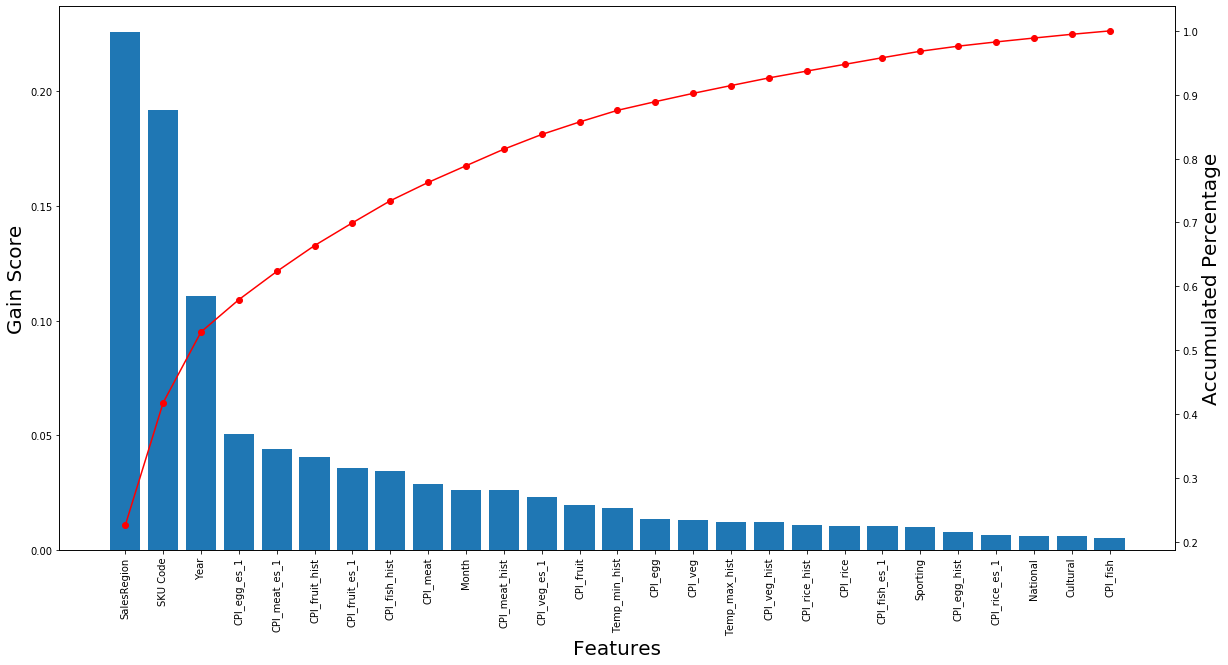

In [188]:
featureis=model_xgb(bstr, totalsetdroped, xcols, param)

In [189]:
colsfilter2=featureis.index[:10].to_list()
colsfilter2

['SalesRegion',
 'SKU Code',
 'Year',
 'CPI_egg_es_1',
 'CPI_meat_es_1',
 'CPI_fruit_hist',
 'CPI_fruit_es_1',
 'CPI_fish_hist',
 'CPI_meat',
 'Month']

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       152.682587       5.627596     154.431644      9.647731
1       122.875603       4.393853     126.136914      8.640821
2       108.555293       3.776621     114.159122      7.356556
3        99.889026       3.885832     108.298296      6.209667
4        93.564670       3.620344     104.373439      6.404271
5        88.240423       2.134693     101.187230      6.192409
6        80.239964       3.775405      94.996066      3.451432
7        74.989731       2.111463      92.207532      5.128606
8        69.887863       3.098665      88.322588      4.264441
9        66.214085       2.500439      85.358641      5.229646
10       61.711086       1.760994      82.671001      4.918719
11       59.419181       2.169858      81.390633      5.200169
12       57.856410       2.041120      80.821094      4.915963
13       56.099511       1.767657      79.790869      5.189624
14       54.186973       1.389868      78.680479      5

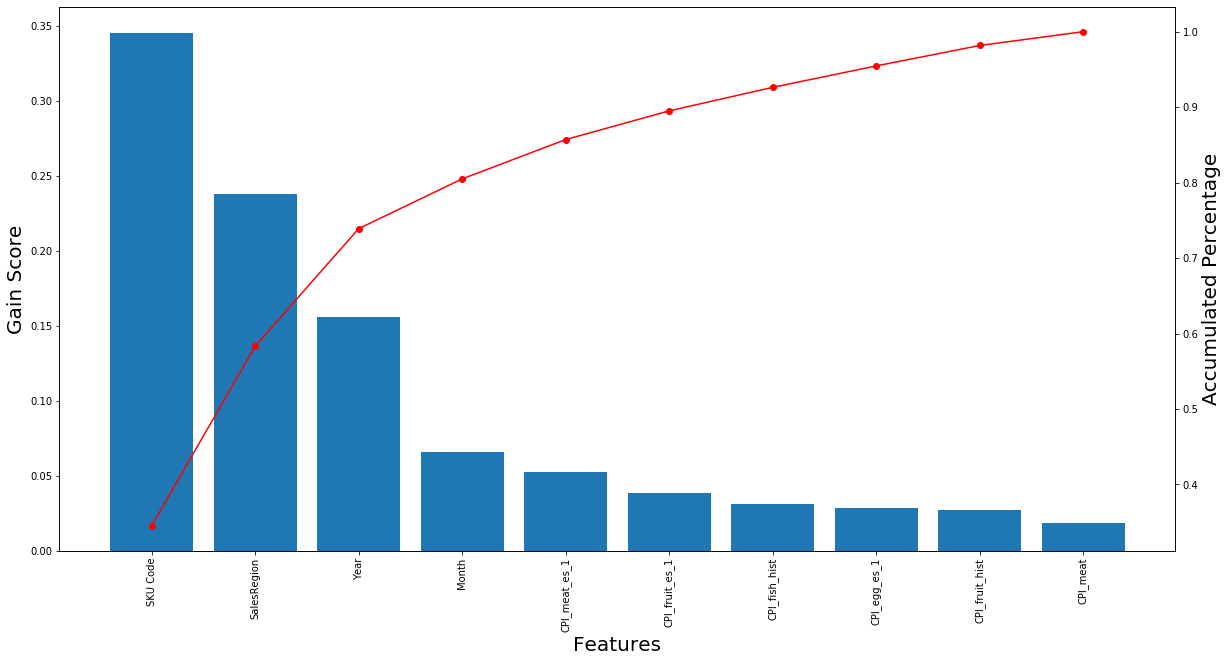

In [190]:
featureis1=model_xgb(bstr, totalsetdroped, colsfilter2, param)